In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
IMAGE_PATH = 'graphs/'
DF_PATH_NUM = lambda x: 'experiments-final{}/'.format(x)
DF_PATH = DF_PATH_NUM(3)

### Needed Constants and Variables

In [4]:
SURVEY_ZONE_MAPPING = {'30': (2, 2, 0), '22': (3, 1, 2), '2c': (2, 0, 0), '28': (2, 2, 1), '25': (3, 2, 1), '26': (3, 1, 1), '27': (3, 0, 1), '20': (2, 2, 2), '21': (3, 2, 2), '1e': (3, 1, 2), '23': (3, 0, 2), '24': (2, 0, 1), '29': (3, 2, 1), '1a': (3, 1, 3), '0': (1, 0, 3), '3': (3, 1, 0), '2': (3, 2, 0), '5': (1, 0, 0), '1d': (3, 2, 2), '7': (2, 1, 1), '1f': (3, 0, 2), '9': (3, 1, 1), '8': (3, 2, 1), '3a': (3, 1, 3), '1c': (2, 0, 2), '4': (3, 0, 0), 'a': (3, 0, 1), '6': (1, 0, 1), '39': (3, 2, 3), '12': (1, 0, 2), '3b': (3, 0, 3), '1b': (3, 0, 3), 'b': (1, 0, 2), '13': (1, 0, 2), 'd': (3, 2, 2), '11': (1, 0, 3), '10': (1, 0, 3), 'c': (2, 1, 2), '38': (2, 0, 3), '15': (1, 0, 1), '14': (1, 0, 1), '17': (1, 0, 0), 'f': (3, 0, 2), '19': (3, 2, 3), '32': (3, 1, 0), '31': (3, 2, 0), '16': (1, 0, 0), '37': (3, 0, 3), '36': (3, 1, 3), '35': (3, 2, 3), '34': (2, 1, 3), '2d': (3, 2, 0), '2e': (3, 1, 0), '2f': (3, 0, 0), '1': (2, 1, 0), '2a': (3, 1, 1), '2b': (3, 0, 1), '18': (2, 2, 3), '33': (3, 0, 0), 'e': (3, 1, 2)}

In [5]:
_demands = [
    450,
    900,
    (450, 900),
    (900, 1800)
]

_weights = [
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (0.5, 0.5, 0),
    (0, 0.5, 0.5),
    (0.5, 0, 0.5),
    (0.33, 0.33, 0.33),
    (0, 0, 0)
]

_model_type = {
    (1, 0, 0): 'Delay priority',
    (0, 1, 0): 'Throughput priority',
    (0, 0, 1): 'Flow priority',
    (0.5, 0.5, 0): 'Delay-Throughput priority',
    (0, 0.5, 0.5): 'Throughput-Flow priority',
    (0.5, 0, 0.5): 'Delay-Flow priority',
    (0.33, 0.33, 0.33): 'Equal priority',
    (0, 0, 0): 'Parent model',
}

cols = [
    'Delay priority',
    'Throughput priority',
    'Flow priority',
    'Delay-Throughput priority',
    'Throughput-Flow priority',
    'Delay-Flow priority',
    'Equal priority',
    'Parent model'
]

In [6]:
time_range = 30
time_ticks = np.arange(0, time_range+1, 1)

parameters = {
    'r_left': 0.25,
    'r_through': 0.5,
    'r_right': 0.25,
    'sat_flow_rate': 1800,
    'time_range': time_range,
    'time_step': 2,
    'g_min': 6,
    'g_max': 20,
    'flow_rate_reduction': 1
}

## Loading dataframes

In [6]:
# Results of the MILP solver only (Expected)

df_milp = pd.read_pickle(DF_PATH + 'milp-realtime-results.pkl')

df_milp.head()

,runtime,delay,throughput,objective_value,demand,new_model,alpha,beta,gamma,model_type,epoch
0,165.902929,3069.088608,51.278481,709.539027,450,True,1.00,0.00,0.00,Delay priority,0
5,540.855196,3069.088608,51.278481,-666.881330,450,True,0.50,0.00,0.50,Delay-Flow priority,0
3,475.487772,3069.088608,51.278481,258.865157,450,True,0.50,0.50,0.00,Delay-Throughput priority,0
6,752.900086,3069.088608,51.278481,-503.438553,450,True,0.33,0.33,0.33,Equal priority,0
2,573.475265,3265.265823,52.278481,-2055.801688,450,False,0.00,0.00,1.00,Flow priority,0


In [7]:
# Results of the LocalSim simulator only (Actual)

df_ave_delay = pd.read_pickle(DF_PATH + 'ave_delay.pkl')
df_total_delay = pd.read_pickle(DF_PATH + 'total_delay.pkl')
df_total_thru = pd.read_pickle(DF_PATH + 'total_throughput.pkl')

df_total_thru.head()

level_1,"(1, 0, 0)","(1, 0, 1)","(1, 0, 2)","(1, 0, 3)",demand,new_model,alpha,beta,gamma,model_type
0,1041.0,1097.0,1225.0,1047.0,450,True,1.0,0.0,0.0,Delay priority
1,1069.0,921.0,978.0,1065.0,450,True,0.0,1.0,0.0,Throughput priority
2,1037.0,1011.0,1083.0,1134.0,450,True,0.0,0.0,1.0,Flow priority
3,1083.0,1024.0,1141.0,1140.0,450,True,0.5,0.5,0.0,Delay-Throughput priority
4,1119.0,1062.0,1105.0,1070.0,450,True,0.0,0.5,0.5,Throughput-Flow priority


In [8]:
# Comparing computed and measured values (Expected vs Actual)

df_delay_comp = pd.read_pickle(DF_PATH + 'delay_comparison.pkl')
df_thru_comp = pd.read_pickle(DF_PATH + 'throughput_comparison.pkl')

df_delay_comp.head()

,demand,model_type,expected,actual,epoch
95,450,Delay priority,3069.088608,586.502250,0
94,450,Delay priority,7251.949367,6335.827368,1
93,450,Delay priority,9542.202532,12108.485748,2
92,450,Throughput priority,3500.000000,534.838405,0
91,450,Throughput priority,8846.936709,6466.848478,1


## Checking AVERAGE actual delay in the 32 cases

In [27]:
_df_total_delays = []

for i in [1,2,3]:
    df_total_delay = pd.read_pickle(DF_PATH_NUM(i) + 'total_delay.pkl')
    df_total_delay['total_delay'] = df_total_delay.iloc[:, :24].sum(axis=1)
    df_total_delay_table = df_total_delay.pivot(index='demand', columns='model_type', values='total_delay')[cols]

    df_total_delay_table = df_total_delay_table.apply(lambda x: x / 3600)
    _df_total_delays.append(df_total_delay_table)
    
_df_concat = pd.concat(_df_total_delays)
df_total_delay_ave = _df_concat.groupby(_df_concat.index).mean()
df_total_delay_ave.round(2)

model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority,Parent model
demand,,,,,,,,
450,23.45,28.33,27.63,29.54,26.66,30.66,26.31,26.26
900,75.02,75.72,75.54,76.20,76.16,74.18,76.00,70.97
"(450, 900)",46.88,50.75,48.75,48.36,49.31,48.06,46.41,45.87
"(900, 1800)",79.67,81.43,80.08,78.94,79.83,78.76,78.35,56.98


In [28]:
df_delay_percent = (df_total_delay_ave.iloc[:, :-1] - df_total_delay_ave[['Parent model']].values) * -100 / df_total_delay_ave[['Parent model']].values

df_delay_percent

model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority
demand,,,,,,,
450,10.708090,-7.854235,-5.204077,-12.486028,-1.493373,-16.728739,-0.183924
900,-5.704963,-6.685056,-6.438551,-7.372925,-7.312196,-4.523419,-7.089308
"(450, 900)",-2.203089,-10.647128,-6.284988,-5.433171,-7.507476,-4.786506,-1.186402
"(900, 1800)",-39.828003,-42.911747,-40.536035,-38.543696,-40.096033,-38.228108,-37.499373


## Checking AVERAGE actual throughput in the 32 cases

In [29]:
_df_total_thrus = []

for i in [1,2,3]:
    df_total_thru = pd.read_pickle(DF_PATH_NUM(i) + 'total_throughput.pkl')
    df_total_thru['total_throughput'] = df_total_thru.iloc[:, :4].sum(axis=1)
    df_total_thru_table = df_total_thru.pivot(index='demand', columns='model_type', values='total_throughput')[cols]

    _df_total_thrus.append(df_total_thru_table)
    
_df_concat = pd.concat(_df_total_thrus)
df_total_thru_ave = _df_concat.groupby(_df_concat.index).mean()
df_total_thru_ave.round(2)

model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority,Parent model
demand,,,,,,,,
450,4166.67,4086.33,4219.00,4380.67,4303.67,4203.00,4048.67,4229.33
900,6003.67,5893.00,5993.67,5928.00,6111.00,5856.67,6015.67,6275.67
"(450, 900)",5007.33,5334.33,5210.67,5073.33,5109.00,5273.33,5019.00,5647.67
"(900, 1800)",6774.33,6797.33,6820.00,6814.67,6705.33,6703.33,6801.00,6863.00


## By what percent?

In [19]:
df_thru_percent = (df_total_thru_ave.iloc[:, :-1] - df_total_thru_ave[['Parent model']].values) * 100 / df_total_thru_ave[['Parent model']].values

df_thru_percent.round(2)

model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority
demand,,,,,,,
450,-1.48,-3.38,-0.24,3.58,1.76,-0.62,-4.27
900,-4.33,-6.10,-4.49,-5.54,-2.62,-6.68,-4.14
"(450, 900)",-11.34,-5.55,-7.74,-10.17,-9.54,-6.63,-11.13
"(900, 1800)",-1.29,-0.96,-0.63,-0.70,-2.30,-2.33,-0.90


## Checking ratio of Delay and Throughput

In [32]:
_df_delay_ratios = []

for i in [1,2,3]:
    df_total_delay = pd.read_pickle(DF_PATH_NUM(i) + 'total_delay.pkl')
    df_total_delay['total_delay'] = df_total_delay.iloc[:, :24].sum(axis=1)
    df_total_delay_table = df_total_delay.pivot(index='demand', columns='model_type', values='total_delay')[cols]
    
    df_total_thru = pd.read_pickle(DF_PATH_NUM(i) + 'total_throughput.pkl')
    df_total_thru['total_throughput'] = df_total_thru.iloc[:, :4].sum(axis=1)
    df_total_thru_table = df_total_thru.pivot(index='demand', columns='model_type', values='total_throughput')[cols]
    
    _df_delay_ratios.append(df_total_delay_table.div(df_total_thru_table))
    
_df_concat = pd.concat(_df_delay_ratios)
df_total_delay_ratio = _df_concat.groupby(_df_concat.index).mean()
df_total_delay_ratio.round(2)

model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority,Parent model
demand,,,,,,,,
450,20.22,24.95,23.58,24.28,22.29,26.20,23.38,22.30
900,44.99,46.27,45.39,46.27,44.87,45.60,45.51,40.73
"(450, 900)",33.70,34.26,33.70,34.32,34.75,32.78,33.33,29.24
"(900, 1800)",42.34,43.13,42.28,41.70,42.86,42.32,41.48,29.89


## Getting the best values

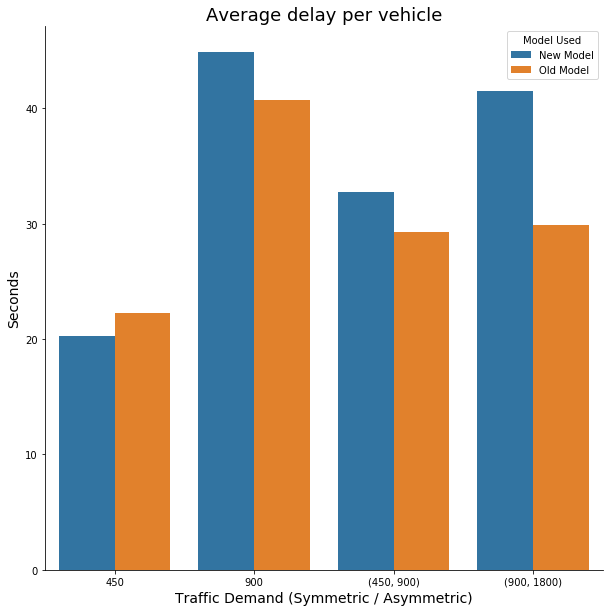

In [9]:
# D, TF, DF, DTF

# initialise data of lists. 
data = {'Old Model':[22.30, 40.73, 29.24, 29.89], 'New Model':[20.22, 44.87, 32.78, 41.48]} 
  
# Creates pandas DataFrame. 
df_barpl = pd.DataFrame(data, index =['450', '900', '(450, 900)', '(900, 1800)'])

df_barpl_stack = df_barpl.stack().reset_index().rename(columns={'level_1': 'Model Used'})

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x="level_0", y=0, hue="Model Used", data=df_barpl_stack, ax=ax)
sns.despine()
ax.set_xlabel("Traffic Demand (Symmetric / Asymmetric)", fontsize=14)
ax.set_ylabel("Seconds", fontsize=14)
ax.set_title("Average delay per vehicle", fontsize=18)

fig.savefig('avedelay.png', transparent=True)

## Checking initial computation runtime in the 32 cases

In [23]:
df_milp = pd.read_pickle(DF_PATH_NUM(1) + 'milp-realtime-results.pkl')
df_milp[df_milp.epoch == 0].pivot(index='demand', columns='model_type', values='runtime')[cols].round(2)

model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority,Parent model
demand,,,,,,,,
450,165.90,268.79,573.48,475.49,293.79,540.86,752.90,370.31
900,5.30,284.86,617.50,6.77,292.91,8.85,10.81,200.26
"(450, 900)",40.05,104.16,151.78,48.29,134.06,51.76,86.14,87.43
"(900, 1800)",2.31,48.83,80.19,2.36,47.80,2.70,2.57,13.58


## Checking recomputation runtime in the 32 cases (average across epochs)

In [25]:
df_milp = pd.read_pickle(DF_PATH_NUM(3) + 'milp-realtime-results.pkl')
df_milp[df_milp.epoch != 0].pivot_table(index='demand', columns='model_type', values='runtime', aggfunc='mean')[cols].round(2)

model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority,Parent model
demand,,,,,,,,
450,2.09,0.62,0.68,2.00,0.53,2.42,2.09,94.55
900,2.11,0.80,0.60,2.08,1.04,2.18,1.96,87.25
"(450, 900)",2.27,0.79,0.41,2.13,1.65,2.38,2.34,93.56
"(900, 1800)",1.89,0.42,0.51,1.92,0.58,2.12,2.07,100.47


In [19]:
np.mean([165.90, 292.91, ])

2.0

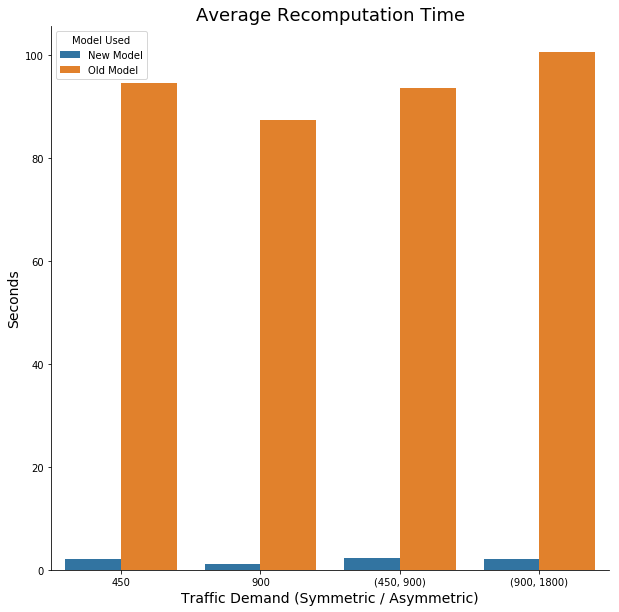

In [8]:
# D, TF, DF, DTF

# initialise data of lists. 
data = {'Old Model':[94.55, 87.25, 93.56, 100.47], 'New Model':[2.09, 1.04, 2.38, 2.07]} 
  
# Creates pandas DataFrame. 
df_barpl = pd.DataFrame(data, index =['450', '900', '(450, 900)', '(900, 1800)']) 

df_barpl_stack = df_barpl.stack().reset_index().rename(columns={'level_1': 'Model Used'})

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x="level_0", y=0, hue="Model Used", data=df_barpl_stack, ax=ax)
ax.set_xlabel("Traffic Demand (Symmetric / Asymmetric)", fontsize=14)
ax.set_ylabel("Seconds", fontsize=14)
ax.set_title("Average Recomputation Time", fontsize=18)

sns.despine()


fig.savefig('averecomp.png', transparent=True)

## Checking error of computed and measured delay

In [25]:
df_delay_comp['error'] = df_delay_comp.apply(lambda row: (row.expected - row.actual) * 100 / (row.expected), axis=1)
df_delay_error = df_delay_comp.pivot_table(index='demand', columns='model_type', values='error', aggfunc=np.mean)[cols]

print("Percent error of delay")
df_delay_error

Percent error of delay


model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority,Parent model
demand,,,,,,,,
450,23.536827,26.565925,18.096882,22.311242,22.758359,28.203353,26.557773,15.970851
900,1.757159,-2.225410,0.950064,-2.386939,-1.333119,6.480363,1.931195,-11.276170
"(450, 900)",15.934269,10.958733,7.503806,12.694105,13.877350,21.151143,9.112346,10.382346
"(900, 1800)",11.160346,7.694975,8.390018,12.913339,12.547256,13.136823,14.300369,36.122191


## Checking error of computed and measured throughput

In [26]:
df_thru_comp['error'] = df_thru_comp.apply(lambda row: (row.expected - row.actual) * 100 / (row.expected), axis=1)
df_thru_error = df_thru_comp.pivot_table(index='demand', columns='model_type', values='error', aggfunc=np.mean)[cols]

print("Percent error of throughput")
df_thru_error

Percent error of throughput


model_type,Delay priority,Throughput priority,Flow priority,Delay-Throughput priority,Throughput-Flow priority,Delay-Flow priority,Equal priority,Parent model
demand,,,,,,,,
450,-401.085780,-402.079098,-446.453349,-439.766310,-418.828671,-423.693560,-379.997331,-184.726601
900,-631.809725,-591.948876,-683.630749,-630.130619,-655.104925,-625.972222,-631.531069,-304.747589
"(450, 900)",-504.102516,-535.748474,-549.525794,-510.595568,-550.954609,-526.686328,-516.684345,-258.630079
"(900, 1800)",-674.675019,-731.432242,-773.791120,-717.361506,-734.716206,-736.194816,-735.423359,-327.231681


## Plot of cumulative delay (lower curve is better)

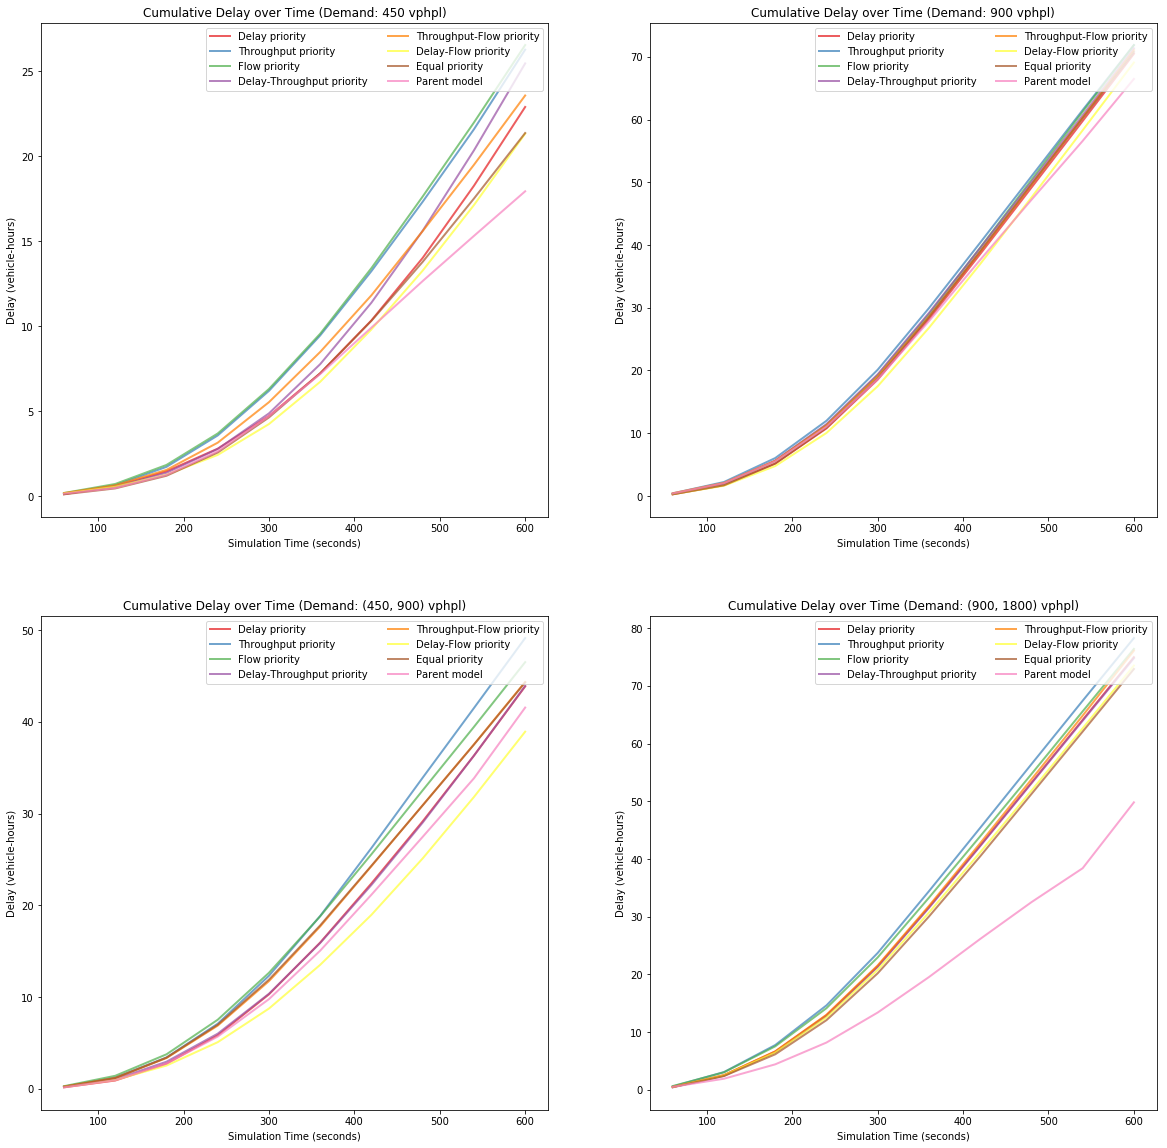

In [27]:
fig, axs = plt.subplots(2,2,figsize=(20,20))

for ndx, demand in enumerate(_demands):

    df_cumudelays = pd.DataFrame(index=[x for x in range(60,601,60)])

    for weights in _weights:
        df_tmp = pd.read_pickle(DF_PATH + 'cumu-delay/delay_d{}_a{}_b{}_c{}.pkl'.format(demand, *weights))
        df_cumudelays[_model_type[weights]] = df_tmp.iloc[:, 4:].sum(axis=1).apply(lambda x: x / 3600)
        
    palette = plt.get_cmap('Set1')
    num=0

    for column in df_cumudelays:
        axs[ndx / 2, ndx % 2].plot(df_cumudelays.index, df_cumudelays[column], marker='', color=palette(num), linewidth=2, alpha=0.7, label=column)
        num+=1

    # Add legend
    axs[ndx / 2, ndx % 2].legend(loc=1, ncol=2)

    # Add titles
    axs[ndx / 2, ndx % 2].set_title("Cumulative Delay over Time (Demand: {} vphpl)".format(demand))
    axs[ndx / 2, ndx % 2].set_xlabel("Simulation Time (seconds)")
    axs[ndx / 2, ndx % 2].set_ylabel("Delay (vehicle-hours)")

## Plot of cumulative throughput (higher is better)

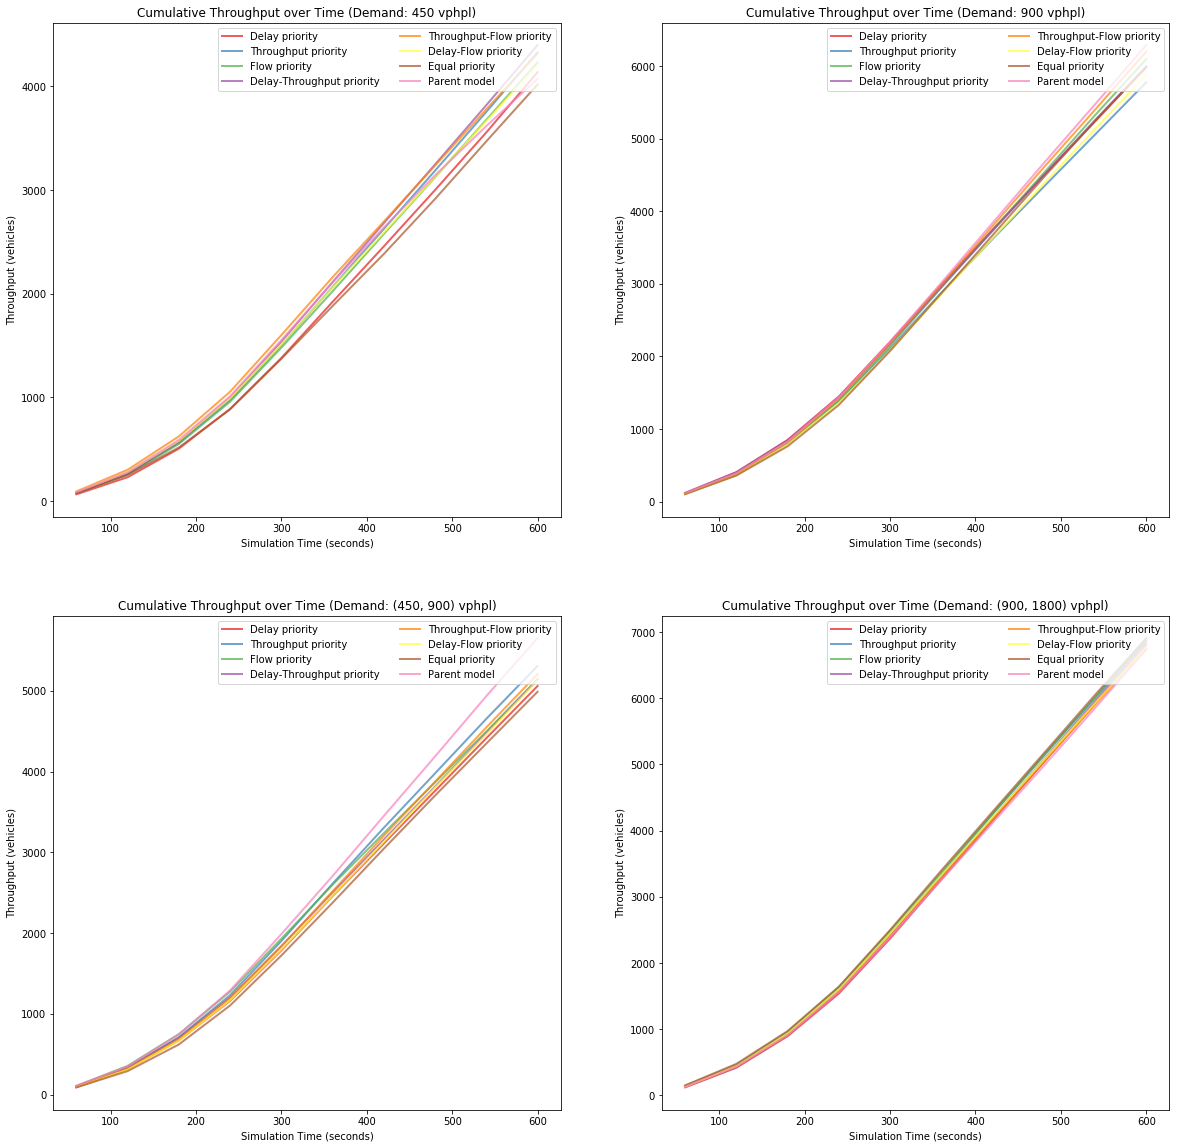

In [28]:
fig, axs = plt.subplots(2,2,figsize=(20,20))

for ndx, demand in enumerate(_demands):

    df_cumuthrus = pd.DataFrame(index=[x for x in range(60,601,60)])

    for weights in _weights:
        df_tmp = pd.read_pickle(DF_PATH + 'cumu-thru/thru_d{}_a{}_b{}_c{}.pkl'.format(demand, *weights))
        df_cumuthrus[_model_type[weights]] = df_tmp.sum(axis=1)
        
    palette = plt.get_cmap('Set1')
    num=0

    for column in df_cumuthrus:
        axs[ndx / 2, ndx % 2].plot(df_cumuthrus.index, df_cumuthrus[column], marker='', color=palette(num), linewidth=2, alpha=0.7, label=column)
        num+=1

    # Add legend
    axs[ndx / 2, ndx % 2].legend(loc=1, ncol=2)

    # Add titles
    axs[ndx / 2, ndx % 2].set_title("Cumulative Throughput over Time (Demand: {} vphpl)".format(demand))
    axs[ndx / 2, ndx % 2].set_xlabel("Simulation Time (seconds)")
    axs[ndx / 2, ndx % 2].set_ylabel("Throughput (vehicles)")